In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer

## 1. Cargar los datos

In [27]:
data=pd.read_csv('winequality-red.csv')[["pH", "free sulfur dioxide", "residual sugar", "quality"]]
res=data.describe()
res

,pH,free sulfur dioxide,residual sugar,quality
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.311113,15.874922,2.538806,5.636023
std,0.154386,10.460157,1.409928,0.807569
min,2.740000,1.000000,0.900000,3.000000
25%,3.210000,7.000000,1.900000,5.000000
50%,3.310000,14.000000,2.200000,6.000000
75%,3.400000,21.000000,2.600000,6.000000
max,4.010000,72.000000,15.500000,8.000000


In [28]:
res=data.describe()
res

,pH,free sulfur dioxide,residual sugar,quality
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.311113,15.874922,2.538806,5.636023
std,0.154386,10.460157,1.409928,0.807569
min,2.740000,1.000000,0.900000,3.000000
25%,3.210000,7.000000,1.900000,5.000000
50%,3.310000,14.000000,2.200000,6.000000
75%,3.400000,21.000000,2.600000,6.000000
max,4.010000,72.000000,15.500000,8.000000


In [29]:
data.value_counts("quality")

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

## 2. Escoger numero de clusters

In [30]:
X = data[["pH", "free sulfur dioxide", "residual sugar"]]
X_norm = pd.DataFrame(
        Normalizer()
        .fit_transform(X),
        columns=X.columns
)
y = data["quality"]

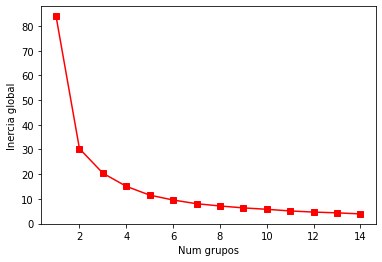

In [31]:
# Método de codo
# Existen otros como:Criterio de Calinski, Affinity propagation (AP)
# Gap, dendogramas
inercias = [KMeans(n_clusters=k, init='k-means++').fit(X_norm).inertia_ for k in range(1, 15)]
plt.plot(np.arange(1,15),inercias, marker='s', color='red')
plt.xlabel('Num grupos')
plt.ylabel('Inercia global')
plt.show()
# maxima variacion se encuentra en 2 grupos (gráfica de codo)
# existe otro quiebre en 3 y 4 grupos

[[0.19390358 0.96624306 0.1359774 ]
 [0.47088316 0.77942588 0.36150044]]


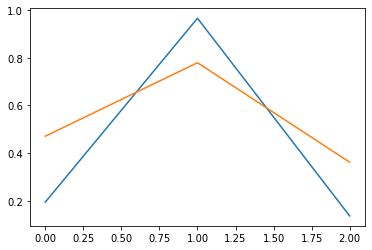

In [32]:
# cluster aleatorio
kmeans = KMeans(n_clusters=2,init='k-means++').fit(X_norm)
#init='random'
#init='ndarray'
# Obtener los centroides
C = kmeans.cluster_centers_
print(C) 
plt.plot(C.T);
# se obitienen las medias de cada centroide

In [33]:
C

array([[0.19390358, 0.96624306, 0.1359774 ],
       [0.47088316, 0.77942588, 0.36150044]])

## 3. Predecir los clusters

In [34]:
grupos = kmeans.predict(X)#Nos dice que observación pertenece a cada grupo
colores=['red','orange','blue', 'purple', 'green', 'yellow']
asignar = [colores[row] for row in grupos]
px.scatter_3d(data, x='pH', y='free sulfur dioxide', z='residual sugar', color=asignar)

In [41]:
# %%Extraer los elementos de cada clúster
#Cluster 1
idx_0 = grupos==0
subdata_0 = X[idx_0]
print(
    (pd.value_counts(data['quality'][idx_0])/pd.value_counts(data['quality'])*100)
    .reset_index().rename(columns={'index':'quality', 'quality':'% Cluster 1'})
)

   quality  % Cluster 1
0        5    78.120411
1        6    73.510972
2        7    62.814070
3        4    54.716981
4        8    50.000000
5        3    40.000000


In [42]:
#Cluster 2
idx_1 = grupos==1
subdata_1 = X[idx_1]
print(
    (pd.value_counts(data['quality'][idx_1])/pd.value_counts(data['quality'])*100)
    .reset_index().rename(columns={'index':'quality', 'quality':'% Cluster 2'})
)

   quality  % Cluster 2
0        3    60.000000
1        4    45.283019
2        5    21.879589
3        6    26.489028
4        7    37.185930
5        8    50.000000


In [43]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([773, 773], dtype=int64)

In [38]:
#Nombres de los usuarios más cercanos al centroide.
quality=data['quality'].values 
for row in closest:
    print(quality[row])
# centroide compartido?

6
6
